# Zad 1. 
Dwa prostokąty. Są zdefiniowane przez współrzędne dwóch przeciwległych wierzchołków; np. pierwszy prostokąt (1,3) i (5,7) (na wejściu mamy 4 współrzędne podane), nie wiadomo które to z przeciwległych wierzchołków (czy to dolny lewy i górny prawy, czy górny lewy i dolny prawy) i my mamy znaleźć prostokąt który jest częścią wspólną tych prostokątów (najlepiej ifami) i zapisać ten znaleziony jako dwa przeciwległe wierzchołki i jego pole i obwód znaleźć. (wsp. tych prostokątów na wejściu są całkowite)

Współrzędne nowego prostokąta: (2, 4) i (5, 5)
Pole: 3
Obwód: 8


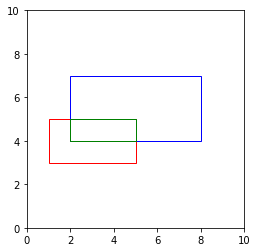

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Wpisujemy przykładowe punkty
rect1 = [1, 3, 5, 5]
rect2 = [2, 4, 8, 7]

def find_rectangle_intersection(rect1, rect2):
    # Posortowanie wartości  -  x_min mniejsze o x_max
    x1_min, x1_max = sorted(rect1[::2])   # slicing żeby wziąć z listy co drugi element i posortować   -> z danych [1,3,5,5] bierze 1 i 5
    y1_min, y1_max = sorted(rect1[1::2])  # slicing żeby wziąć co drugi element zaczynając od drugiego i posortować
    x2_min, x2_max = sorted(rect2[::2])  
    y2_min, y2_max = sorted(rect2[1::2]) 

    # Obliczanie granic przecięcia, najbardziej wysunięte na lewo i prawo granice przecięcia osi X
    left, right = max(x1_min, x2_min), min(x1_max, x2_max)    #  przecięcia w osi X
    # bottom i top - najbardziej wysunięte na dół i górę granice przecięcia osi Y
    bottom, top = max(y1_min, y2_min), min(y1_max, y2_max)    #  przecięcia w osi Y

    # Jeśli left < right i bottom < top, oznacza to, że prostokąty się przecinają, 
    # ponieważ przecięcie ma dodatnie wymiary (szerokość i wysokość).
    if left < right and bottom < top:
        area = (right - left) * (top - bottom)
        perimeter = 2 * ((right - left) + (top - bottom))
        return [left, bottom, right, top, area, perimeter]
    
    # Jeśli prostokąty się nie przecinają, zwracamy None
    return None

# Wywołanie funkcji
result = find_rectangle_intersection(rect1, rect2)

if result:
    left, bottom, right, top, area, perimeter = result
    print(f"Współrzędne nowego prostokąta: ({left}, {bottom}) i ({right}, {top})")
    print(f"Pole: {area}")
    print(f"Obwód: {perimeter}")
else:
    print("Prostokąty się nie przecinają. Spróbuj wprowadzić inne dane.")




# Narysowanie prostokątów i powstałego prostokąta w wyniku przecięcia
def draw_rectangles(rect1, rect2, intersection):
    fig, ax = plt.subplots()

    def draw_rect(rect, color):
        ax.add_patch(patches.Rectangle((min(rect[0], rect[2]), min(rect[1], rect[3])), 
                                       abs(rect[2] - rect[0]), abs(rect[3] - rect[1]), 
                                       linewidth=1, edgecolor=color, facecolor='none'))
    draw_rect(rect1, 'r')
    draw_rect(rect2, 'b')

    if intersection:
        draw_rect(intersection[:4], 'g')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


draw_rectangles(rect1, rect2, result)

# Zad 2.
Dany jest wielomian a = [ 1, 2, 3, 5 ,7 ] i to interpretujemy jako wielomian a0 +a1x+ a2x^2 + ... wszystkie wsp sa całkowite;
znalezienie wszystkich pierwiastków wymiernych tego wielomianu, one sa postaci p/q, gdzie p jest dzielnikiem a0, a q to dzielnik elementu przy najwyższej potędze. (wersja minimum to wystarczy znaleźć dzielniki całkowite q); pełna wersja to wszystkie pierwiastki wymierne;

znaleźć pierwiastki wymierne wielomianu  

DO POPRAWY

In [2]:
def znajdz_dzielniki(n):
    n = abs(n)  # Wartość bezwzględna, by obsłużyć liczby ujemne
    return [i for i in range(1, n + 1) if n % i == 0] + [-i for i in range(1, n + 1) if n % i == 0]

def znajdz_dzielniki_q(wspolczynniki):
    an = wspolczynniki[0]  # Współczynnik przy najwyższej potędze
    a0 = wspolczynniki[-1]  # Współczynnik przy najniższej potędze
    return {"an_dzielniki": znajdz_dzielniki(an), "a0_dzielniki": znajdz_dzielniki(a0)}

def spr_pierwiastka(wsp, x):
    wartosc = sum(wsp[i] * (x ** (len(wsp) - 1 - i)) for i in range(len(wsp)))
    return wartosc

# do znalezienia wszyskich potencjalnych pierwastków:
def znajdz_pierwiastki_wymierne(wspolczynniki):
    q_dzielniki = znajdz_dzielniki_q(wspolczynniki)
    a0_dzielniki = q_dzielniki["a0_dzielniki"]
    an_dzielniki = q_dzielniki["an_dzielniki"]
    
    pierwiastki = []
    for p in a0_dzielniki:
        for q in an_dzielniki:
            x = p / q
            if x not in pierwiastki and abs(spr_pierwiastka(wspolczynniki, x)) < 1e-9:
                pierwiastki.append(x)
    
    return pierwiastki

# Testujemy
wielomian = [1, -6, 11, -6]  # x^3 - 6x^2 + 11x - 6
pierwiastki_wymierne = znajdz_pierwiastki_wymierne(wielomian)
print("Pierwiastki wymierne wielomianu:", pierwiastki_wymierne)

Pierwiastki wymierne wielomianu: [1.0, 2.0, 3.0]


# Dodatkowe zadanie
Podobne co na wykładzie

Działanie na macierzach 2x2 (dodawanie, mnożenie, odejmowanie)

Macierz + macierz = wydrukowana następna macierz



In [3]:
import numpy as np

# klasa macierzy
class Macierz2x2:
    def __init__(self, elementy):
        if len(elementy) != 2 or any(len(wiersz) != 2 for wiersz in elementy):
            raise ValueError("Macierz musi być 2x2")
        self.elementy = np.array(elementy, dtype=float)
    
    # dodawanie na tych samych pozycjach
    def __add__(self, inna):
        return Macierz2x2(self.elementy + inna.elementy)
    
    # odejmowanie na tych samych pozycjach
    def __sub__(self, inna):
        return Macierz2x2(self.elementy - inna.elementy)
    
    # mnożenie przez iloczyn macierzyowy
    def __mul__(self, inna):
        return Macierz2x2(np.dot(self.elementy, inna.elementy))
    
    # podnosi do potęgi całkowitej nieujemnej
    def __pow__(self, wykladnik):
        if not isinstance(wykladnik, int) or wykladnik < 0:
            raise ValueError("Wykładnik musi być nieujemną liczbą całkowitą")
        wynik = np.linalg.matrix_power(self.elementy, wykladnik)
        return Macierz2x2(wynik)
    
    def odwrotna(self):
        wyznacznik = np.linalg.det(self.elementy)
        if wyznacznik == 0:
            raise ValueError("Macierz jest osobliwa i nie może być odwrócona")
        return Macierz2x2(np.linalg.inv(self.elementy))
    
    def __str__(self):
        return str(self.elementy)


# interfejs użytkownika
class KalkulatorMacierzy:
    @staticmethod
    def pobierz_macierz_z_wejscia():
        print("Podaj elementy macierzy 2x2 wierszami:")
        macierz = [[float(input(f"Element [{i+1},{j+1}]: ")) for j in range(2)] for i in range(2)]
        return Macierz2x2(macierz)
    
    @staticmethod
    def uruchom():
        print("Kalkulator Macierzy (2x2)")
        macierz1 = KalkulatorMacierzy.pobierz_macierz_z_wejscia()
        macierz2 = KalkulatorMacierzy.pobierz_macierz_z_wejscia()
        
        print("Dodawanie:\n", macierz1 + macierz2)
        print("Odejmowanie:\n", macierz1 - macierz2)
        print("Mnożenie:\n", macierz1 * macierz2)
        
        try:
            print("Odwrotność pierwszej macierzy:\n", macierz1.odwrotna())
        except ValueError as e:
            print(e)
        
        try:
            print("Odwrotność drugiej macierzy:\n", macierz2.odwrotna())
        except ValueError as e:
            print(e)

if __name__ == "__main__":
    KalkulatorMacierzy.uruchom()

Kalkulator Macierzy (2x2)
Podaj elementy macierzy 2x2 wierszami:


Element [1,1]:  1
Element [1,2]:  2
Element [2,1]:  3
Element [2,2]:  4


Podaj elementy macierzy 2x2 wierszami:


Element [1,1]:  5
Element [1,2]:  6
Element [2,1]:  7
Element [2,2]:  8


Dodawanie:
 [[ 6.  8.]
 [10. 12.]]
Odejmowanie:
 [[-4. -4.]
 [-4. -4.]]
Mnożenie:
 [[19. 22.]
 [43. 50.]]
Odwrotność pierwszej macierzy:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Odwrotność drugiej macierzy:
 [[-4.   3. ]
 [ 3.5 -2.5]]
